# Ноутбук для анализа сайтов организаций Москвы

## Импорты

In [1]:
!pip3 install seaborn
!pip3 install sklearn

In [26]:
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(19.7,5)})

In [ ]:
constructors_domains = 'tilda|wix|clients.site|business.site|turbo.site|ticketscloud.org|2gis.biz|tb.ru'
multilink_domains = 'linktr|taplink|mssg|meconnect|hipolink|ylink|avatap|profeat.site'

In [27]:
def import_data(path):
    data = pd.read_csv(path)
    data = data['outputs'].apply(lambda x: eval(x)).apply(pd.Series)
    data = data.drop_duplicates(['name', 'website'])
    return data

In [28]:
def create_website_type(data):
    data['website_type'] = 'no site'
    data.loc[data['website'] != '' ,'website_type'] = 'common'
    constructors_domains_in = (data['website'].str.contains(constructors_domains))&(data['website'].str != 'nan')
    data.loc[constructors_domains_in,'website_type'] = 'constructors'    
    multilink_domains_in = (data['website'].str.contains(multilink_domains))&(data['website'].str != 'nan')
    data.loc[multilink_domains_in, 'website_type'] = 'multilink'
    return data

In [29]:
def preprocess_data(data):
    data = create_website_type(data)
    data['rating'] = data['rating'].apply(lambda x: x.replace(',', '.'))
    data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
    data['has_website'] = data['website'] != ''
    data['has_social'] = data['social'].str.len() > 0
    data['has_phone'] = data['phone'].str.len() > 0
    return data

In [30]:
def website_social_confusion_matrix(data, axs):
    cfm = confusion_matrix(data['has_website'],data['has_social'])
    sns.heatmap(cfm,annot=True,cmap="Blues", ax=axs[2])
    plt.ylabel('Наличие сайта')
    plt.xlabel('Наличие соц сетей')

In [31]:
def type_site_plot(data, axs):
    sns.histplot(data=data, x="website_type", ax=axs[1])

In [32]:
def price_plot(data, axs):
    sns.kdeplot(data=data, x="rating", hue="website_type", multiple="stack", ax=axs[0])

In [36]:
def subplot(data):
    fig, axs = plt.subplots(1, 3)
    axs = axs.ravel()
    price_plot(data, axs)
    type_site_plot(data, axs)
    website_social_confusion_matrix(data, axs)
    plt.show()

hotel_outputs.csv


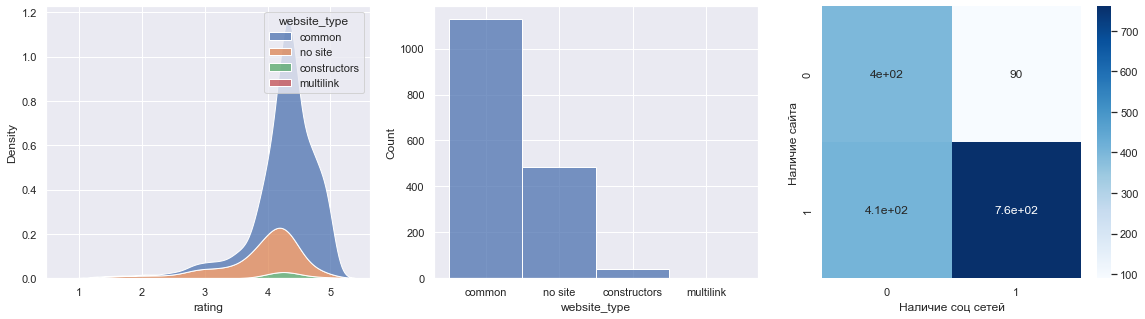

showroom_outputs.csv


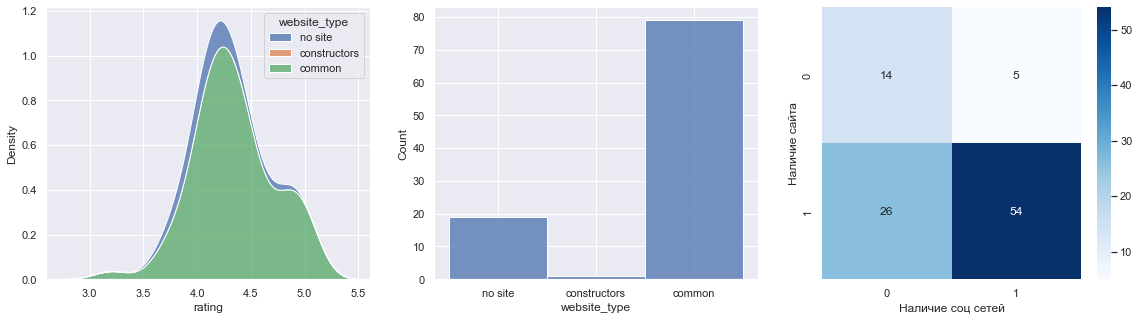

auto_outputs.csv


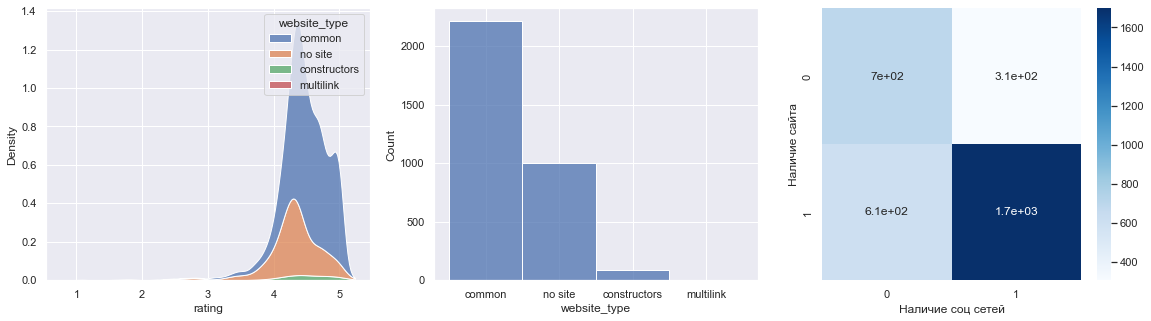

studio_outputs.csv


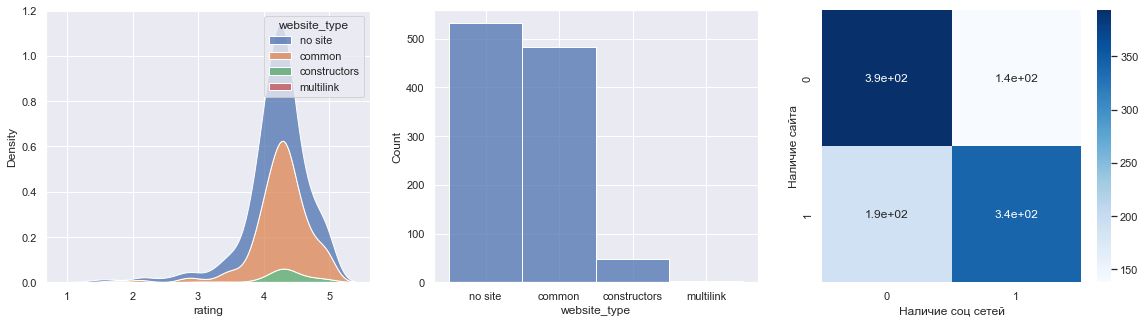

salon_outputs.csv


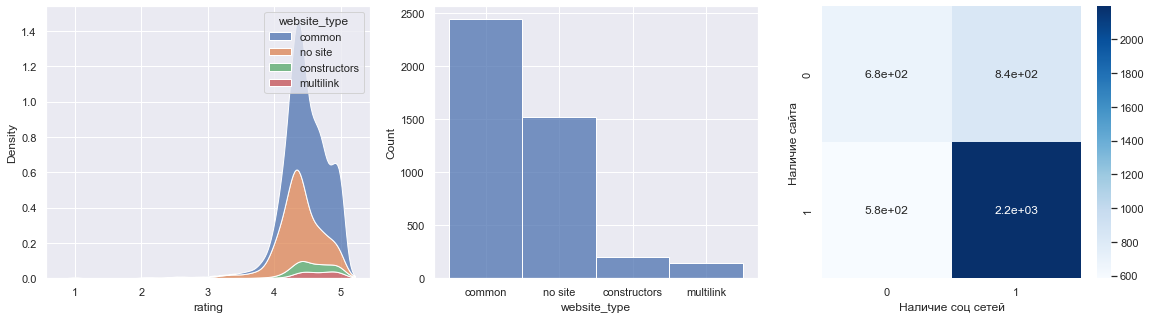

sport_outputs.csv


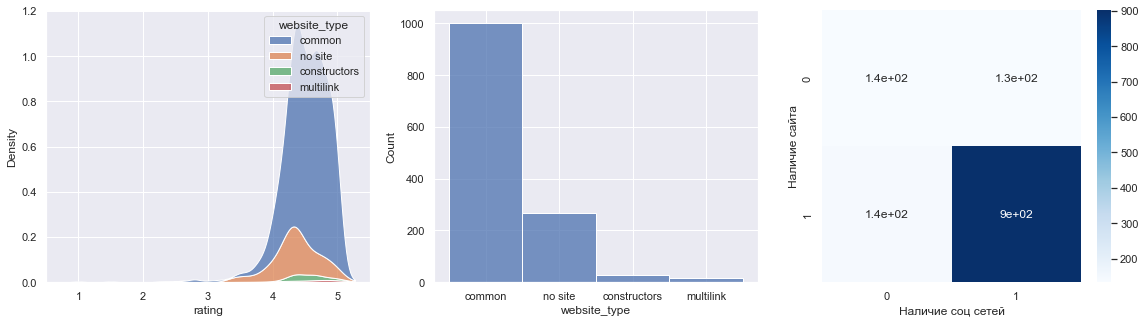

cafe_outputs.csv


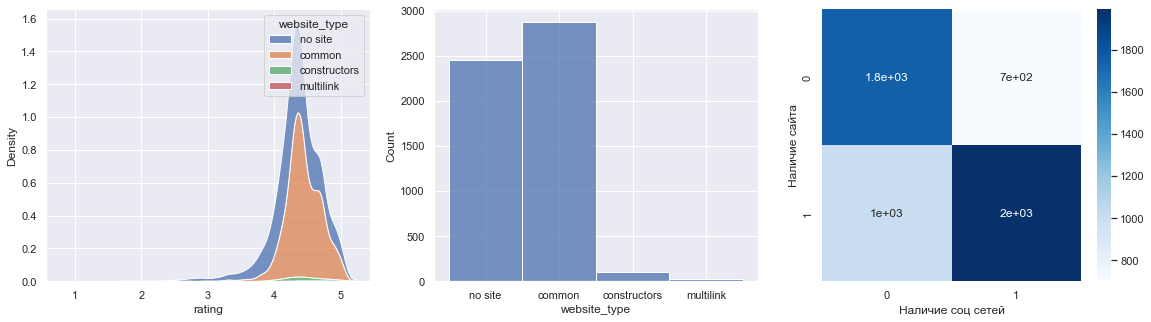

In [37]:
for org_type in os.listdir('../result_output/'):
    print(org_type)
    subplot(preprocess_data(import_data(f'../result_output/{org_type}')))

In [ ]:
type_org_mapping = {
    'cafe': 'Кафе',
    'sport': 'Фитнес',
    'salon': 'Салоны красоты',
    'studio': 'Ателье',
    'auto': 'Автосалоны',
    'showroom': 'Шоу-рум',
    'hotel': 'Отель',
    'psychology': 'Психологическая консультация',
    'lawyer': 'Юридические услуги',
    'dancing': 'Школа танцов',
    'barber': 'Парикмахерская',
    'massage': 'Массажный салон',
    'accountant': 'Бухгалтерские услуги',
    'translator': 'Бюро переводов',
    'cleaning': 'Клининговые услуги',
    'phones': 'Ремонт телефонов',
    'nails': 'Ногтевая студия',
}